# k-mean

1. 랜덤으로 데이터 중에 중심 위치를 고름(중심 위치의 갯수 : K개)
2. 모든 데이터를 대상으로 각각의 중심 위치까지의 거리를 계산
3. 각 데이터에서 가장 가까운 거리의 중심 위치를 선택해서 그 데이터가 속하는 군집을 정함
4. 각 군집 내에서 다시 중심 위치를 계산
5. 2~4번까지 반복

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


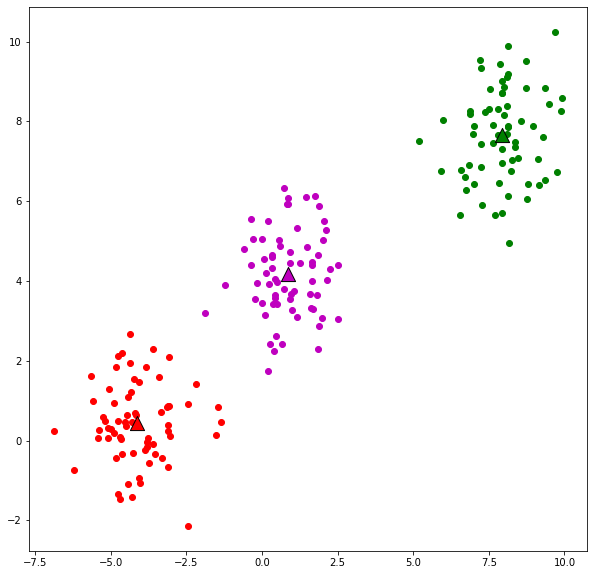

In [137]:
from sklearn.cluster import KMeans
X, _ = make_blobs(n_samples= 200, random_state= 3, centers = 3)

model = KMeans(n_clusters= 3).fit(X)

c0,c1,c2 = model.cluster_centers_

plt.figure(figsize = (10,10))

#데이터 시각화
plt.scatter(X[model.labels_ == 0,0], X[model.labels_ == 0,1],  facecolor = 'r')
plt.scatter(X[model.labels_ == 1,0], X[model.labels_ == 1,1],  facecolor = 'g')
plt.scatter(X[model.labels_ == 2,0], X[model.labels_ == 2,1],  facecolor = 'm')
# plt.scatter(X[model.labels_ == 3,0], X[model.labels_ == 3,1], facecolor = 'c')
# plt.scatter(X[model.labels_ == 4,0], X[model.labels_ == 4,1],  facecolor = 'y')

#데이터의 중심점
plt.scatter(c0[0],c0[1], s = 200, facecolor = 'r', marker = '^',edgecolors='k')
plt.scatter(c1[0],c1[1], s = 200, facecolor = 'g', marker = '^', edgecolors='k')
plt.scatter(c2[0],c2[1], s = 200, facecolor = 'm', marker = '^', edgecolors='k')
# plt.scatter(c3[0],c3[1], s = 200, facecolor = 'c', marker = '^', edgecolors='k')
# plt.scatter(c4[0],c4[1], s = 200, facecolor = 'y', marker = '^', edgecolors='k')

# DBSCAN(밀도를 이용한 군집화 방법)
- 군집의 갯수를 사용자가 지정할 필요가 없음
- 초기 데이터에서 근접한 데이터를 해당 군집으로 확장
- 최소 거리: 현재 데이터를 기준으로 근접한 데이터를 판별하기 위한 거리: eps(epsilon)
- 최소 데이터 갯수 : 밀집된 공간을 정의하기 위한 데이터의 최소 갯수

1. 최소 거리와 최소 데이터 갯수를 만족하는 데이터를 핵심 데이터(코어)
2. 핵심 데이터 중 이웃이 없는 데이터를 경계 데이터
3. 핵심도 아니고 경계도 아닌 데이터를 아웃라이어

In [138]:
from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import DBSCAN

In [148]:
n_samples = 1000
np.random.seed(2)

X1,y1 = make_circles(n_samples=n_samples, factor=0.5, noise=0.09)
X2,y2 = make_moons(n_samples=n_samples, noise=0.1)

def plt_DBSCAN(title,X,eps):
    model = DBSCAN(eps = eps)
    y_pred = model.fit_predict(X)
    idx_outlier = model.labels_ == -1
    
    #outlier
    plt.scatter(X[idx_outlier, 0], X[idx_outlier,1], marker = 'x')
    
    #일반 데이터
    plt.scatter(X[model.labels_==0, 0], X[model.labels_==0,1], marker = 'o', c = 'g', s = 5)
    plt.scatter(X[model.labels_==1, 0], X[model.labels_==1,1], marker = 's', c = 'y', s = 5)
    
    #코어 데이터
    X_core = X[model.core_sample_indices_,:]
    idx_core_0 = np.array(list(set(np.where(model.labels_ == 0)[0]).intersection(model.core_sample_indices_)))
    idx_core_1 = np.array(list(set(np.where(model.labels_ == 1)[0]).intersection(model.core_sample_indices_)))
    
    plt.scatter(X[idx_core_0, 0], X[idx_core_0,1], marker = 'o', c = 'g', s = 80, alpha=0.3)
    plt.scatter(X[idx_core_1, 0], X[idx_core_1,1], marker = 's', c = 'y', s = 80, alpha=0.3)
    plt.grid(False)
    plt.title(title)
    
    return y_pred

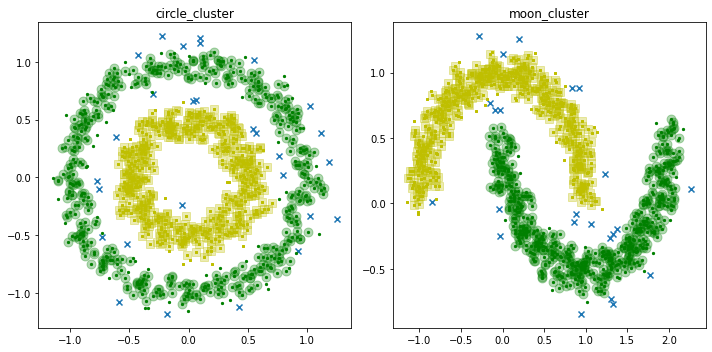

In [161]:
plt.figure(figsize=(10,5))
plt.subplot(121)
y_1 = plt_DBSCAN('circle_cluster', X1, 0.1)
plt.subplot(122)
y_2 = plt_DBSCAN('moon_cluster', X2, 0.1)
plt.tight_layout()
plt.show()

In [166]:
from sklearn.metrics.cluster import adjusted_rand_score, silhouette_score
print(adjusted_rand_score(y1,y_1))
print(adjusted_rand_score(y2,y_2))

#실루엣 계수는 군집의 형태가 복잡하면 좀 정상적인 비교가 안됨
print(silhouette_score(X1,y_1))
print(silhouette_score(X2,y_2))

0.9414262371038592
0.9544844153926417
0.08800694711230335
0.1964606027191373
